# <center> FUNDAMENTOS DE APRENDIZAJE AUTOMÁTICO <br> Y RECONOCIMIENTO DE PATRONES</center>
## <center> 2do parcial, 2021</center>           

La duración del parcial es de 3 horas. El parcial consta de 3 ejercicios, cuya suma total es de 100 puntos. El parcial es sin material y no está permitido acceder a Internet. Ante cualquier duda comuníquese con los docentes. 

Este notebook corresponde al ejercicio 3. Hay un notebook por ejercicio planteado.

* [Ejercicio 3 - SVM](#Ejercicio3) (30 puntos)

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from IPython.display import Image

import time

from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix

from fuaa_utils_ej3 import fashion_mnist_load_data
from fuaa_utils_ej3 import fashion_mnist_plot_data
from fuaa_utils_ej3 import identificar_parcial
from fuaa_utils_ej3 import plot_svc_decision_function
from fuaa_utils_ej3 import fuaa_plot_confusion_matrix

plt.rcParams['figure.figsize'] = (10, 10)

identificar_parcial()

Usuario julian.o.flaherty en pcunix152.fing.edu.uy.


<a id="Ejercicio3"></a>
# Ejercicio 3

En este ejercicio se aplican **Máquinas de Vectores de Soporte** (**SVM**, *Support Vector Machines*) a problemas **multi-clase**. 

No todos los modelos predictivos de clasificación admiten la clasificación de múltiples clases. Por ejemplo, algoritmos como el Perceptron, Regresión Logística y Máquinas de Vectores de Soporte, están diseñados para  clasificación binaria y no permiten en su formulación original abordar problemas de clasificación con más de dos clases.

Un enfoque para usar algoritmos de clasificación binaria en problemas de clasificación múltiple es dividir el conjunto de datos de múltiples clases en múltiples conjuntos de datos de clasificación binaria y ajustar un modelo de clasificación binaria en cada uno. 

Dos ejemplos diferentes de este enfoque son las estrategias: uno contra el resto (ovr, **One-vs-Rest**) y uno contra uno (ovo, **One-vs-One**). 

Para comenzar consideramos un conjunto de datos sintético con tres clases, tal como se define a continuación.

In [2]:
# se definen datos sintéticos multi-clase
n_samples_train = 1000
n_samples_test = 200
random_state = 42
cluster_std = 1.5
cluster_centers = [(0,10), (5,2), (-5,-1)]

# datos de train
X_train, y_train = make_blobs(n_samples=n_samples_train,
                              centers=cluster_centers,
                              cluster_std=cluster_std,
                              random_state=random_state)
# datos de test
X_test, y_test = make_blobs(n_samples=n_samples_test,
                            centers=cluster_centers,
                            cluster_std=cluster_std,
                            random_state=random_state+4)

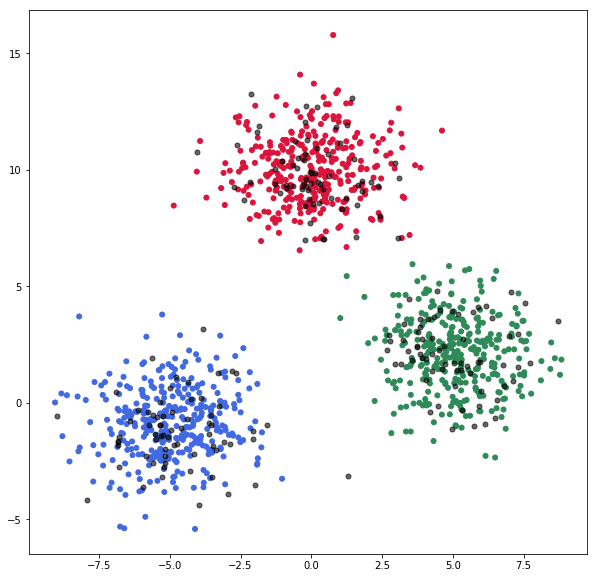

In [3]:
# se representan los datos gráficamente
colors = ['crimson', 'seagreen', 'royalblue']
cmap = LinearSegmentedColormap.from_list("mycmap", colors)

plt.figure(figsize=(10,10))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=25, cmap=cmap)
plt.scatter(X_test[:, 0], X_test[:, 1], c='black', s=25, alpha=0.6)

### Ejercicio 3 - parte a) 

Complete la siguiente función, `svm_multiclass_models`, que implementa la estrategia **uno vs el resto (ovr)** entrenando un modelo para cada clase. Dada una de las clases, se construye un problema binario en el que dicha clase se considera como la clase positiva ($y = +1$) y el resto de los datos como la clase negativa ($y=-1$). Luego se crea y entrena un modelo SVM con **kernel lineal** usando las funciones de `scikit-learn` (en particular `svm.SVC`). Los modelos se guardan en una lista `svms` que se devuelve como salida de la función `svm_multiclass_models`.

**Nota:** Al crear el SVM usando la función `svm.SVC` se debe especificar el parámetro `probability=TRUE`, lo que permite que el modelo devuelva una probabilidad de pertenencia a la clase positiva y negativa mediante la función `predict_proba`.

In [4]:
def svm_multiclass_models(X, y):
    """Se ajustan modelos svm con kernel lineal, tantos modelos como clases, en un esquema uno vs el resto.
   
    Entrada:
        X: muestras de entrenamiento
        y: etiquetas asociadas a las muestras de entrenamiento
        
    Salida:
        svms: lista con los modelos entrenado para cada clase
    """  
    
    # valores que toman las etiquetas
    lab_vals = np.unique(y)
    # cantidad de clases
    num_classes = len(lab_vals)
    # lista de modelos svm
    svms = []
    
    for lab in lab_vals:
        
        ###########################################################################################
        ##################    EMPIEZA ESPACIO PARA COMPLETAR CODIGO   #############################
        ###########################################################################################
        
        # se arman los datos para clasificación binaria
        # indices de la clase positiva
        ind_pos = y == lab 

        # indices de la clase negativa
        ind_neg = y != lab

        
        # etiquetas para el problema binario
        y_train = -np.ones(y.shape)
        y_train[ind_pos] = 1 

        
        # se ajusta un svm con: kernel='linear' y probability=True
        clf_svm = svm.SVC(kernel="linear", probability=True)
        clf_svm.fit(X, y_train)
        
        ###########################################################################################
        ##################    TERMINA ESPACIO PARA COMPLETAR CODIGO   #############################
        ###########################################################################################
        
        svms.append(clf_svm)
    
    return svms

### Ejercicio 3 - parte b) 

Una vez implementada la función `svm_multiclass_models`, ejecute las siguientes celdas para ajustar los modelos SVM y representarlos gráficamente. Luego responda la pregunta que está despues de estas celdas.

**NOTA:** En la última celda se muestra una imagen de referencia de lo que debería obtener si la implmentación es correcta. Responda la pregunta que sigue.

In [5]:
svms = svm_multiclass_models(X_train, y_train)

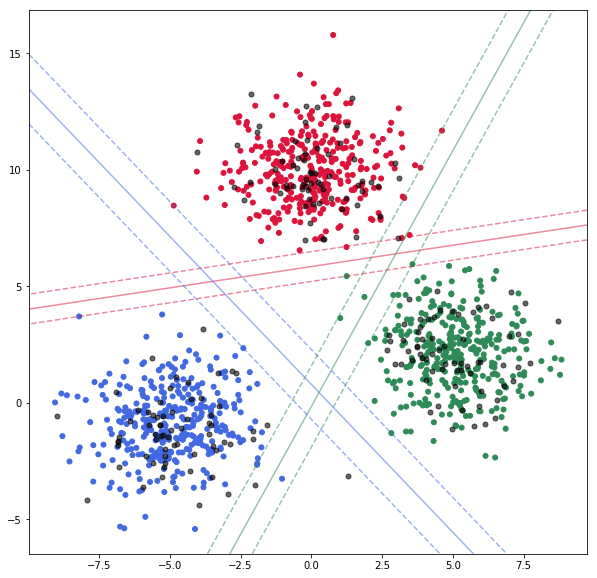

In [6]:
# cantidad de clases
num_classes = len(np.unique(y_train))
    
# se representan los datos y los modelos gráficamente
plt.figure(figsize=(10,10))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=25, cmap=cmap)
plt.scatter(X_test[:, 0], X_test[:, 1], c='black', s=25, alpha=0.6)
colors = ['crimson', 'seagreen', 'royalblue']
for ind in range(num_classes):
    plot_svc_decision_function(svms[ind], color=colors[ind])


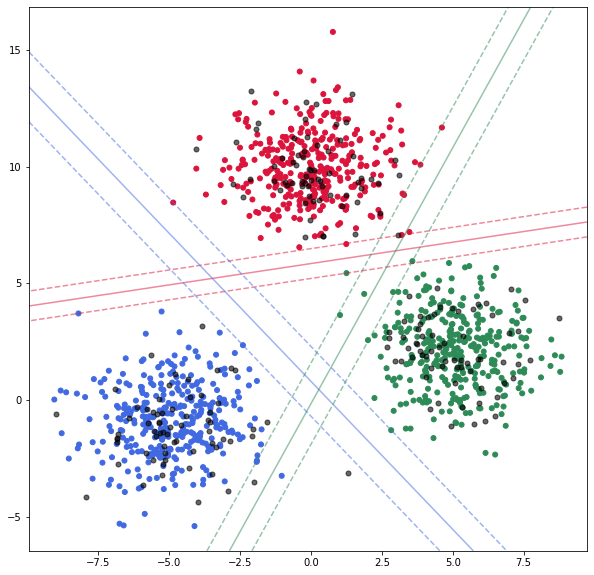

In [7]:
Image(filename='svm_ovr.png') 

**Pregunta:** Los modelos SVM creados con `scikit-learn` mediante la función `svm.SVC()` son capaces de manejar problemas multi-clase. Consulte la ayuda de la función `svm.SVC()` e indique qué estrategia se usa para manejar multiples clases (One-Vs-Rest ó One-Vs-One).

In [8]:
# esta celda solo se utiliza para consultar la ayuda de scikit-learn
svc = svm.SVC()

**Respuesta:**

Variando el parametro decision_function_shape podeoms optar si queremos un one-v-rest o un one-v-one. Por defecto se usa ovo para hacer un tratamiento multiclase. 

_"The multiclass support is handled according to a one-vs-one scheme."_ (documentación SVC)

### Ejercicio 3 - parte c) 

Complete la siguiente función, `svm_multiclass_models_predict`, que obtiene las predicciones para un conjunto de datos $X$. Para ello se obtienen las probabilidades de pertenecer a la clase positiva y negativa para cada uno de los problemas binarios, mediante la función `predict_proba` de cada modelo SVM. Luego se obtiene la predicción como la clase que maximiza la probabilidad de pertencer a la clase positiva entre los modelos SVM considerados. 

**Nota:** La función `predict_proba` devuelve la probabilidad de cada muestra de pertencer a la clase positiva y a la clase negativa en la forma de un arreglo de dimensiones $(N, 2)$, donde $N$ es el tamaño del conjunto de datos. Las columnas de ese arreglo corresponden a las clases en el orden en que aparecen en el atributo `svm.classes_`. 

In [9]:
def svm_multiclass_models_predict(svms, X_test):
    """Se obtienen las predicciones de los datos X_test usando los modelos en svms en un esquema uno vs el resto"""
    
    # número de clasificadores
    num_clfs = len(svms)
    # tamaño del conjunto de datos
    N = X_test.shape[0]
    
    # matriz de probabilid de pertenencia a cada clase 
    probs = np.zeros((N, num_clfs))
    
    for ind in range(num_clfs):
        
###########################################################################################
##################    EMPIEZA ESPACIO PARA COMPLETAR CODIGO   #############################
###########################################################################################
        
        # modelo svm correspondiente a la clase actual
        clf_svm = svms[ind]
        
        
        # proababilidad de clase positiva y negativa, mediante la función predict_proba
        svm_probs = clf_svm.predict_proba(X_test) 
        
        # se guarda la probabilidad de la clase positiva
        probs[:, ind] = svm_probs[:,np.argmax(clf_svm.classes_==1)]
        
               
    # se obtiene la predicción de los datos como el argumento del máximo de las probabilidades   
    y_pred = np.argmax(probs, axis=1) 


###########################################################################################
##################    TERMINA ESPACIO PARA COMPLETAR CODIGO   #############################
###########################################################################################  
        
    return y_pred

### Ejercicio 3 - parte d) 

Usando el modelo entrenado anteriormente realice la predicción de las etiquetas para los datos de train y de test. 

**NOTA:** Verificar que en ambos casos el error es **menor al 1%**.

In [10]:
###########################################################################################
##################    EMPIEZA ESPACIO PARA COMPLETAR CODIGO   #############################
###########################################################################################

# etiquetas estimadas para el conjunto de train y test
y_train_pred = svm_multiclass_models_predict(svms, X_train) 

y_test_pred = svm_multiclass_models_predict(svms, X_test)


# error de train y test con el modelo para múltiples clases
error_train = np.mean(y_train_pred!=y_train) 

error_test = np.mean(y_test_pred!=y_test) 


###########################################################################################
##################    TERMINA ESPACIO PARA COMPLETAR CODIGO   #############################
###########################################################################################

print('El modelo tiene un error de train de: %f' % error_train)
print('El modelo tiene un error de test de: %f' % error_test)

El modelo tiene un error de train de: 0.001000
El modelo tiene un error de test de: 0.005000


# Fashion MNIST

A continuación se aplica un modelo SVM a un problema multi-clase con datos reales. Para ello se utiliza el conjunto de datos Fashion-MNIST, que consiste en imágenes de artículos de una tienda de ropa y calzado. Cada dato es una imagen en escala de grises de 28 x 28, asociada con una etiqueta de 10 clases. 

En las siguientes celdas se cargan los datos, se definen las etiquetas y se grafican algunos datos de ejemplo.

**NOTA:** Tenga la precaución de **NO** modificar la variable `num` que establece la cantidad de puntos del conjunto de datos.

In [11]:
X, y = fashion_mnist_load_data('data/fashion', kind='t10k')

In [12]:
num = 3000
X = X[:num]
y = y[:num]

In [13]:
labs_txt = ['T-shirt/top', 'Trowser', 'Pullover', 'Dress', 'Coat',
            'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

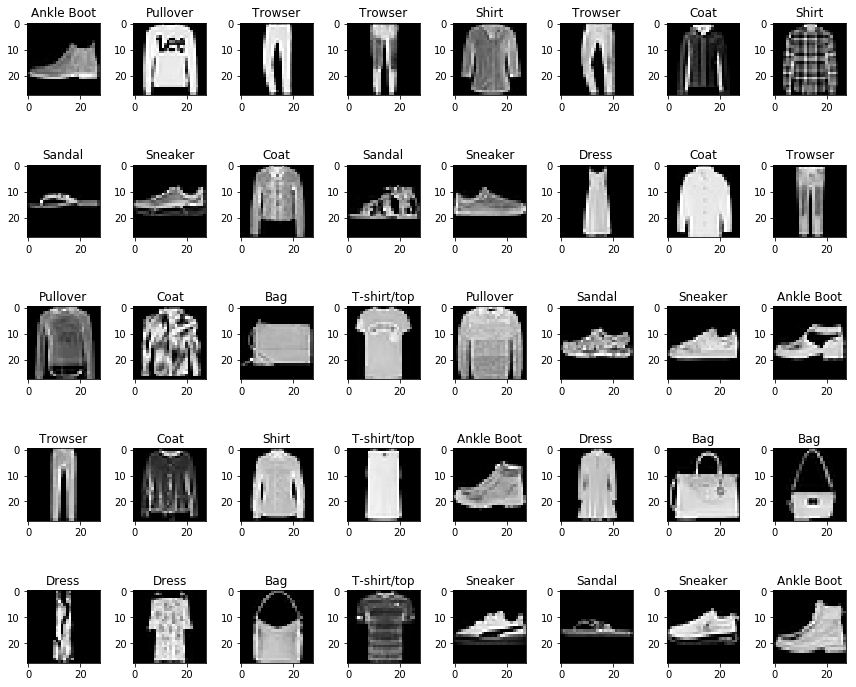

In [14]:
fashion_mnist_plot_data(X, y)

### Ejercicio 3 - parte e) 

Complete el siguiente código para dividir los datos en un conjunto de entrenamiento y otro de test usando la función `train_test_split` de sklearn. La cantidad de datos del conjunto de test debe ser **1/4** del total.

**IMPORTANTE:** Preste atención a usar el parámetro `random_state` tal como está definido en la siguiente celda.

In [15]:
random_state = 42

###########################################################################################
##################    EMPIEZA ESPACIO PARA COMPLETAR CODIGO   #############################
###########################################################################################

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, train_size=0.75)


###########################################################################################
##################    TERMINA ESPACIO PARA COMPLETAR CODIGO   #############################
###########################################################################################

### Ejercicio 3 - parte f) 

Si bien se podrían usar las imágenes de 28x28 (728 características) como representación de la entrada, a menudo es más efectivo usar algún tipo de preprocesado para extraer características más significativas. En este caso usaremos un **análisis de componentes principales (PCA)** para extraer **25 componentes** y con ellos alimentar a un clasificador de máquina de vectores de soporte.

Complete la siguiente función para entrenar un modelo de SVM con los datos transformados con PCA, usado kernel `rbf` por defecto y con parámetros `gamma` y `C` con valores por defecto `C=1` y `gamma=1`. 

**NOTA:** Preste atención a usar los valores de los parámetros `kernel`, `gamma` y `C` que se pasan a la función `svm_train`.

In [16]:
def svm_pca_train(X, y, kernel='rbf', C=1, gamma=1, n_components=25):
    """Se entrena un modelo SVM
    
    Entrada:
        X: muestras de entrenamiento
        y: etiquetas asociadas a las muestras de entrenamiento
        kernel: tipo de kernel ('lineal', 'rbf')
        C: valor del parámetro C
        gamma: valor del parámetro gamma
        
    Salida:
        clf_svm: modelo svm entrenado
        pca: modelo PCA ajustado a los datos
    """
    
    # ajuste de modelo PCA
    pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True)
    pca.fit(X)
    # transformación de los datos con PCA
    X_pca = pca.transform(X)
    
    ##########################################################################################
    ##################    EMPIEZA ESPACIO PARA COMPLETAR CODIGO   #############################
    ###########################################################################################

    clf_svm = svm.SVC(kernel=kernel, C=C, gamma=gamma)
    clf_svm.fit(X_pca, y)


    ###########################################################################################
    ##################    TERMINA ESPACIO PARA COMPLETAR CODIGO   #############################
    ###########################################################################################
    
    return clf_svm, pca

Usando la función `svm_pca_train` implementada anteriormente, ajuste un modelo SVM a los datos de entrenamiento usando los parámetros por defecto. 

**NOTA:** Asegúrese de usar los datos de entrenamiento y los parámetros por defecto. 

In [17]:
start = time.time()

###########################################################################################
##################    EMPIEZA ESPACIO PARA COMPLETAR CODIGO   #############################
###########################################################################################

clf_svm, pca = svm_pca_train(X_train, y_train)


###########################################################################################
##################    TERMINA ESPACIO PARA COMPLETAR CODIGO   #############################
###########################################################################################

end = time.time()
tiempo = end - start
print('El tiempo transcurrido es de: %f segundos' % tiempo)

El tiempo transcurrido es de: 0.438633 segundos


### Ejercicio 3 - parte g) 

Usando el modelo entrenado anteriormente realice la predicción de las etiquetas para los datos de train y de test.

**NOTA:** El SVM recibe datos transformardos con el modelo PCA. Verificar que el error de **train** es **menor al 10%** y el error de **test** es **mayor al 60%**.

In [18]:
start = time.time()

###########################################################################################
##################    EMPIEZA ESPACIO PARA COMPLETAR CODIGO   #############################
###########################################################################################

# se transforman los datos de train y test con el modelo pca obtenido
X_train_pca = pca.transform(X_train)

X_test_pca = pca.transform(X_test) 


# etiquetas estimadas para el conjunto de train y test
y_train_est = clf_svm.predict(X_train_pca) 

y_test_est = clf_svm.predict(X_test_pca) 


# error de train y test con el modelo entrenado con 
# con los parámetros por defecto y los datos originales
error_train = np.mean(y_train != y_train_est) 

error_test = np.mean(y_test != y_test_est) 


###########################################################################################
##################    TERMINA ESPACIO PARA COMPLETAR CODIGO   #############################
###########################################################################################

end = time.time()
tiempo = end - start
print('El tiempo transcurrido es de: %f segundos' % tiempo)

print('El modelo tiene un error de train de: %f' % error_train)
print('El modelo tiene un error de test de: %f' % error_test)

El tiempo transcurrido es de: 0.240529 segundos
El modelo tiene un error de train de: 0.000000
El modelo tiene un error de test de: 0.745333


**OPCIONAL:** Puede ejecutar las siguientes dos celdas para ver ejemplos de clasificación de datos de train y test.

Algunos ejemplos de train, con la etiqueta en rojo si la predicción no es correcta


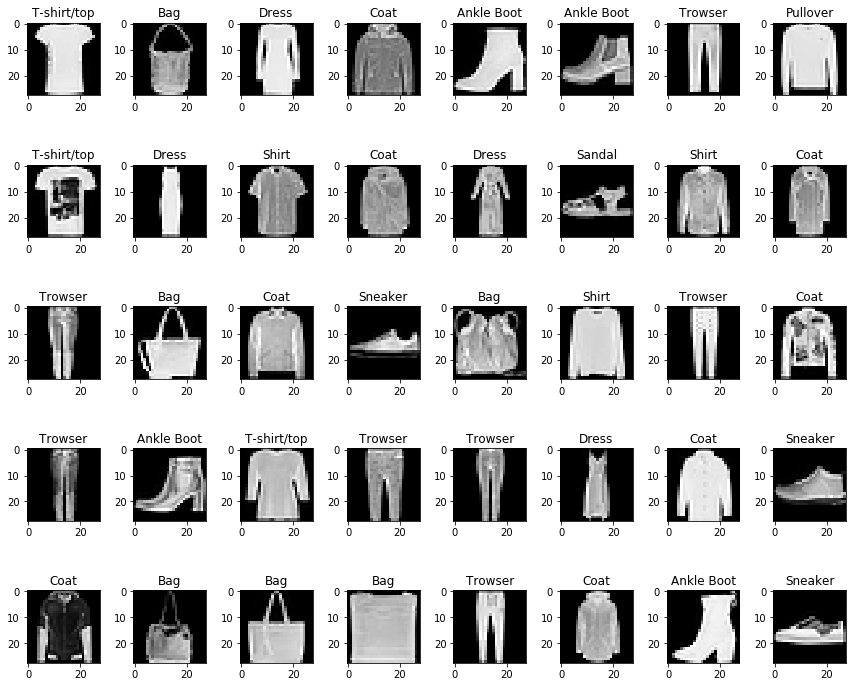

In [19]:
print('Algunos ejemplos de train, con la etiqueta en rojo si la predicción no es correcta')
fashion_mnist_plot_data(X_train, y_train, y_pred=y_train_est)

Algunos ejemplos de test, con la etiqueta en rojo si la predicción no es correcta


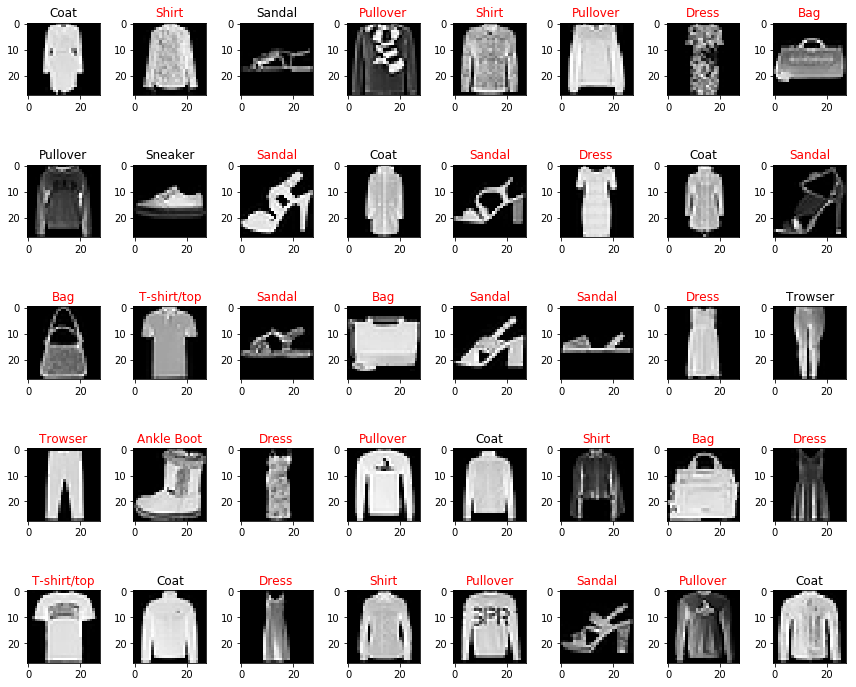

In [20]:
print('Algunos ejemplos de test, con la etiqueta en rojo si la predicción no es correcta')
fashion_mnist_plot_data(X_test, y_test, y_pred=y_test_est)

**Pregunta:** ¿Qué puede decir del modelo comparando el error de train y test? ¿Cómo describiría su punto de operación?

**Respuesta:**

El modelo se esta ajustando bien a los datos de entrenamiento pero no esta generalizando los resultados al conjunto de test. El punto de operación elegido no parece ser el mejor, por lo que se sugiere variar los hiperparámetros buscando mejorar la generalización.

### Ejercicio 3 - parte h) 

A continuación se implementa una búsqueda de los parámetros óptimos del clasificador usando validación cruzada. Para ello, complete el código usando `GridSearchCV` y ajsute un clasificador con los valores óptimos de los parámetros dentro de la grilla definida. Use validación cruzada con **6 folds**.

**NOTA:** Use los datos procesados mediante PCA. Asegúrese de usar **6 folds**. La ejecución de este código puede tardar algunos minutos.

In [21]:
start = time.time()

C_grid = [1e-1, 1e0, 1e1, 1e2]
gamma_grid = [0.01, 0.1, 1.0, 10]


clf_svm_pca = svm.SVC(kernel='rbf')

###########################################################################################
##################    EMPIEZA ESPACIO PARA COMPLETAR CODIGO   #############################
###########################################################################################

# diccionario con la grilla de parámetros
param_grid = {"C": C_grid, "gamma": gamma_grid} 

# instancia de GridSearchCV
grid_CV = GridSearchCV(clf_svm_pca, cv=6, param_grid=param_grid) 
grid_CV.fit(X_train_pca, y_train)

# mejor modelo ajustado
clf_best_pca = grid_CV.best_estimator_


###########################################################################################
##################    TERMINA ESPACIO PARA COMPLETAR CODIGO   #############################
###########################################################################################

end = time.time()
tiempo = end - start
print('El tiempo transcurrido es de: %f' % tiempo)

print("Mejor modelo encontrado por búsqueda en la grilla usando CV:")
print(clf_best_pca)

El tiempo transcurrido es de: 22.396154
Mejor modelo encontrado por búsqueda en la grilla usando CV:
SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


### Ejercicio 3 - parte i) 

Usando el mejor modelo obtenido anteriormente realice la predicción de las etiquetas para los datos de test y responda la pregunta que se plantea a continuación.

**NOTA:** Use los datos procesados mediante PCA. Verificar que el error de **test** es **menor al 20%**.

In [23]:
###########################################################################################
##################    EMPIEZA ESPACIO PARA COMPLETAR CODIGO   #############################
###########################################################################################

# etiquetas estimadas para el conjunto de test
y_test_est = clf_best_pca.predict(X_test_pca)


# error de test con el mejor modelo
error_test = np.mean(y_test_est!=y_test) 


###########################################################################################
##################    TERMINA ESPACIO PARA COMPLETAR CODIGO   #############################
###########################################################################################
print('El mejor modelo obtenido tiene un error de test de: %f' % error_test)

El mejor modelo obtenido tiene un error de test de: 0.182667


**Pregunta:** Explique la diferencia de desempeño obtenida respecto al modelo de la **parte l)**, indicando en qué consiste la validación cruzada y para qué se usa en este caso.

**Respuesta:**

El resultado es mejor porque se modificaron los parametros C y gamma que permiten controlar el sobreajuste a los datos de entrenamiento, y se los eligio tal que C y gamma minimizan el error de validación.

La validación cruzada permite usar una estimación del Eout para elegir hiperparámetros. La validación cruzada consiste en separar el conjunto de entrenamiento en subconjuntos y entrenar el modelo sucesivas veces dejando un subconjunto como conjunto de validación y el resto como conjunto de train, y se calcula $e_i$ el error de validación de ese fold. Luego de entrenar todos los folds, se tiene que: 

$$E_{val} = \sum_{n=1}^{n_{folds}} e_i$$

Utilizando $E_{val}$ como referencia, se eligen los parametros que minimizen el erro de validación. En este caso, usando 6 folds se obtuvo que $C=10$ y $\gamma=0.01$.


### Ejercicio 3 - parte j) 

Para analizar los resultados con mayor detalle se propone utilizar una matriz de confusión. Para ello, ejecute el siguiente código e inspeccione la matriz de confusión resultante. 

Confusion matrix, without normalization


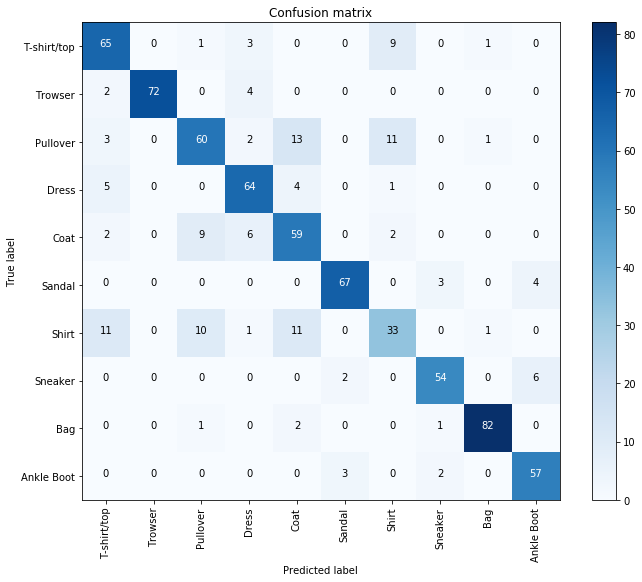

In [24]:
plt.rcParams['figure.figsize'] = (10.0, 8.0)
cnf_matrix = confusion_matrix(y_test, y_test_est)
fuaa_plot_confusion_matrix(cnf_matrix, labs_txt)

**Pregunta:** Comente sobre el tipo de errores que ocurren y las diferencias de desempeño según la clase. Indique a qué pueden deberse las diferencias de desempeño para distintas clases. Tenga en cuenta la siguiente traducción de los nombres de las clases.

| En inglés | T-shirt/top | Trowser | Pullover | Dress | Coat | Sandal | Shirt | Sneaker | Bag | Ankle Boot| 
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
|En español | Camiseta/top | Pantalones | Buzo | Vestido | Abrigo | Sandalia | Camisa | Calzado deportivo | Bolso | Bota hasta el tobillo |


**Respuesta:**

La matriz de confusión permite ver donde ocurren los errores, es decir, que clases se estan confundiendo con que clase. Esto permite un estudio más fino de los problemas que encuentra nuestro clasificador.

Se observa, por ejemplo, que muchas camisas son clasificadas como remeras o abrigos, que es un error entendible porque tienen forma y tamaño similares unos con otros. Sucede parecido con puloveres y abrigos o sandalias y zapatillas.

A modo de mostrar mas profundamente porque se dan los errores, una chomba es una remera que facilmente uno (persona) puede confundir con una camisa según la calidad de la foto, por lo que es razonable que la computadora encuentre problemas similares a la hora de clasificar estas clases.

De la matriz de confusión podemos sacar dos medidas:
- El **accuracy**, que mide qué proporción de elementos asignados a una clase realmente lo eran
- El **recall**, que mide que proporción de los elementso de una clase se asignaron correctametne.

Según la aplicación, una u otra medida puede ser más importante.